# Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download("punkt")
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import re
tokenizer = nltk.RegexpTokenizer(r"[A-Za-z]\w+")
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading Dataset

In [ ]:
data = pd.read_csv('suicide.csv')
data.head()

,text,label
0,I recently went through a breakup and she said...,depression
1,"I do not know how to navigate these feelings, ...",depression
2,"So I have been with my bf for 5 months , and h...",depression
3,I am so exhausted of this. Just when I think I...,SuicideWatch
4,I have been severly bullied since i was 5 till...,depression


In [ ]:
data['label'].value_counts()

depression      10371
SuicideWatch     9992
Name: label, dtype: int64

In [ ]:
data['label'].value_counts().index.values

array(['depression', 'SuicideWatch'], dtype=object)

# Dataset Preprocessing

In [ ]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20363 entries, 0 to 20364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20363 non-null  object
 1   label   20363 non-null  object
dtypes: object(2)
memory usage: 477.3+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20363 entries, 0 to 20364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    20363 non-null  object
 1   label   20363 non-null  object
dtypes: object(2)
memory usage: 477.3+ KB


In [ ]:
data['label'] = data['label'].replace('depression', 0)
data['label'] = data['label'].replace('SuicideWatch', 1)

<ipython-input-37-aabd6df7d1e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace('depression', 0)
<ipython-input-37-aabd6df7d1e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace('SuicideWatch', 1)


In [ ]:
data.head()

,text,label
0,I recently went through a breakup and she said...,0
1,"I do not know how to navigate these feelings, ...",0
2,"So I have been with my bf for 5 months , and h...",0
3,I am so exhausted of this. Just when I think I...,1
4,I have been severly bullied since i was 5 till...,0


In [ ]:
data = data[data['text'].apply(lambda x: len(x.split())<=100)]
data.reset_index(drop=True, inplace=True)

In [ ]:
data['label'].value_counts()


1    5311
0    4533
Name: label, dtype: int64

In [ ]:
for i in range(data.shape[0]):
    tokens = tokenizer.tokenize(data.iat[i,0])
    lowercased_tokens = [t.lower() for t in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
    token_update = [word for word in lemmatized_tokens if not word in stopwords.words()]
    data.iat[i,0] = (" ").join(token_update)
    if i%50 == 0:
      print(i," ")
data.head()

0  
50  
100  
150  
200  
250  
300  
350  
400  
450  
500  
550  
600  
650  
700  
750  
800  
850  
900  
950  
1000  
1050  
1100  
1150  
1200  
1250  
1300  
1350  
1400  
1450  
1500  
1550  
1600  
1650  
1700  
1750  
1800  
1850  
1900  
1950  
2000  
2050  
2100  
2150  
2200  
2250  
2300  
2350  
2400  
2450  
2500  
2550  
2600  
2650  
2700  
2750  
2800  
2850  
2900  
2950  
3000  
3050  
3100  
3150  
3200  
3250  
3300  
3350  
3400  
3450  
3500  
3550  
3600  
3650  
3700  
3750  
3800  
3850  
3900  
3950  
4000  
4050  
4100  
4150  
4200  
4250  
4300  
4350  
4400  
4450  
4500  
4550  
4600  
4650  
4700  
4750  
4800  
4850  
4900  
4950  
5000  
5050  
5100  
5150  
5200  
5250  
5300  
5350  
5400  
5450  
5500  
5550  
5600  
5650  
5700  
5750  
5800  
5850  
5900  
5950  
6000  
6050  
6100  
6150  
6200  
6250  
6300  
6350  
6400  
6450  
6500  
6550  
6600  
6650  
6700  
6750  
6800  
6850  
6900  
6950  
7000  
7050  
7100  
7150  
7200  
7250  
7

,text,label
0,mom made camp hate hate day time midnight call...,0
1,idea simple healthy meal make feel depressed s...,0
2,looming corner back wave moon hear silence fee...,1
3,foodand judged weird view delusional jail life...,1
4,stuck loop ruminating overthinking connect per...,0


# Saving Preprocessed Data

In [ ]:
data.to_csv('drive/My Drive/clean_text.csv')

# Importing Libraries

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
!pip install gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec

In [ ]:
from collections import Counter


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 0.001
SEED = 0

# Train-Test Split

In [ ]:
train_text, temp_text, train_labels, temp_labels = train_test_split(data['text'], data['label'],
                                                                    random_state=SEED,
                                                                    test_size=0.2,
                                                                    stratify=data['label'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=SEED,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

# Word Embedding

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_text)
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size


10498

In [ ]:
vocab = Counter()
tokens_list = [(s.split()) for s in train_text]
for i in tokens_list:
  vocab.update(i)
min_occurance = 2
tokens = [k for k,c in vocab.items() if c >= min_occurance]
print(len(tokens))

5296


In [ ]:
def save_list(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()
 
save_list(vocab, 'vocab.txt')

In [ ]:
def clean_line(line, vocab):
  tokens = line.split()
  tokens_clean = [w for w in tokens if w in vocab]
  return [tokens_clean]

def process_lines(data, vocab):
  lines = list()
  for i in data:
    line = clean_line(i, vocab)
    lines += line
  return lines

In [ ]:
train_clean = process_lines(train_text, vocab)
test_clean = process_lines(test_text, vocab)

In [ ]:
model = Word2Vec(vector_size=100, window=3, min_count=2, epochs=18, seed=SEED)

In [ ]:
model.build_vocab(train_clean, progress_per=200)

In [ ]:
model.train(train_clean, total_examples=model.corpus_count, epochs=EPOCHS,report_delay=1)

(514260, 625940)

In [ ]:
filename = 'embedding_word2vec.txt'
model.wv.save_word2vec_format(filename, binary=False)

In [ ]:
model.wv.most_similar('suicide')

[('hotline', 0.9986385107040405),
 ('method', 0.9986050724983215),
 ('call', 0.9985929727554321),
 ('writing', 0.9985822439193726),
 ('experience', 0.9985818266868591),
 ('painless', 0.9985805749893188),
 ('made', 0.9985700845718384),
 ('hanging', 0.9985649585723877),
 ('calling', 0.9985464215278625),
 ('train', 0.9985345005989075)]

In [ ]:
def tokenize_and_encode(text, max_length=70):
    encoded_docs = tokenizer.texts_to_sequences(text)
    padded_sequence = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    return padded_sequence

tokens_train = tokenize_and_encode(train_text)
tokens_val = tokenize_and_encode(val_text)
tokens_test = tokenize_and_encode(test_text)

In [ ]:
def load_embedding(filename):
	file = open(filename,'r')
	lines = file.readlines()[1:]
	file.close()
	embedding = dict()
	for line in lines:
		parts = line.split()
		embedding[parts[0]] = np.asarray(parts[1:], dtype='float32')
	return embedding

In [ ]:
def get_weight_matrix(embedding, vocab, embedding_dim):
	vocab_size = len(vocab) + 1
	weight_matrix = np.zeros((vocab_size, embedding_dim))
	for word, i in vocab.items():
		weight_matrix[i] = embedding.get(word)
	return weight_matrix

In [ ]:
def create_emb_layer(weights_matrix, non_trainable=False):
    num_embeddings, embedding_dim = weights_matrix.shape[0], weights_matrix.shape[1]
    emb_layer = nn.Embedding(num_embeddings, embedding_dim)
    emb_layer.load_state_dict({'weight': torch.from_numpy(weights_matrix)})
    if non_trainable:
        emb_layer.weight.requires_grad = False

    return emb_layer, num_embeddings, embedding_dim

In [ ]:
raw_embedding_word2vec = load_embedding('embedding_word2vec.txt') 
embedding_vectors_word2vec = get_weight_matrix(raw_embedding_word2vec, tokenizer.word_index, 100)
embedding_vectors_word2vec = np.float32(embedding_vectors_word2vec)

# Model Building and Evaluation

In [ ]:
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout,Conv1D,MaxPooling1D,Flatten


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 

# CNN Model

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100, input_length=70))
model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 70, 100)           1049800   
                                                                 
 conv1d_1 (Conv1D)           (None, 63, 32)            25632     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 31, 32)           0         
 1D)                                                             
                                                                 
 dropout_35 (Dropout)        (None, 31, 32)            0         
                                                                 
 flatten_5 (Flatten)         (None, 992)               0         
                                                                 
 dense_37 (Dense)            (None, 10)                9930      
                                                     

In [ ]:
train=model.fit(tokens_train,train_labels,validation_data=(tokens_val,val_labels),epochs=20,batch_size=256)


Epoch 1/20
31/31 [==============================] - 15s 420ms/step - loss: 0.6886 - accuracy: 0.5583 - val_loss: 0.6860 - val_accuracy: 0.5699
Epoch 2/20
31/31 [==============================] - 12s 394ms/step - loss: 0.6213 - accuracy: 0.6733 - val_loss: 0.6012 - val_accuracy: 0.6821
Epoch 3/20
31/31 [==============================] - 14s 433ms/step - loss: 0.4901 - accuracy: 0.7791 - val_loss: 0.6345 - val_accuracy: 0.6899
Epoch 4/20
31/31 [==============================] - 12s 388ms/step - loss: 0.4138 - accuracy: 0.8248 - val_loss: 0.6769 - val_accuracy: 0.6619
Epoch 5/20
31/31 [==============================] - 13s 402ms/step - loss: 0.3613 - accuracy: 0.8580 - val_loss: 0.8230 - val_accuracy: 0.6614
Epoch 6/20
31/31 [==============================] - 13s 425ms/step - loss: 0.3041 - accuracy: 0.8807 - val_loss: 0.8375 - val_accuracy: 0.6560
Epoch 7/20
31/31 [==============================] - 12s 401ms/step - loss: 0.2757 - accuracy: 0.8939 - val_loss: 0.8942 - val_accuracy: 0.6372

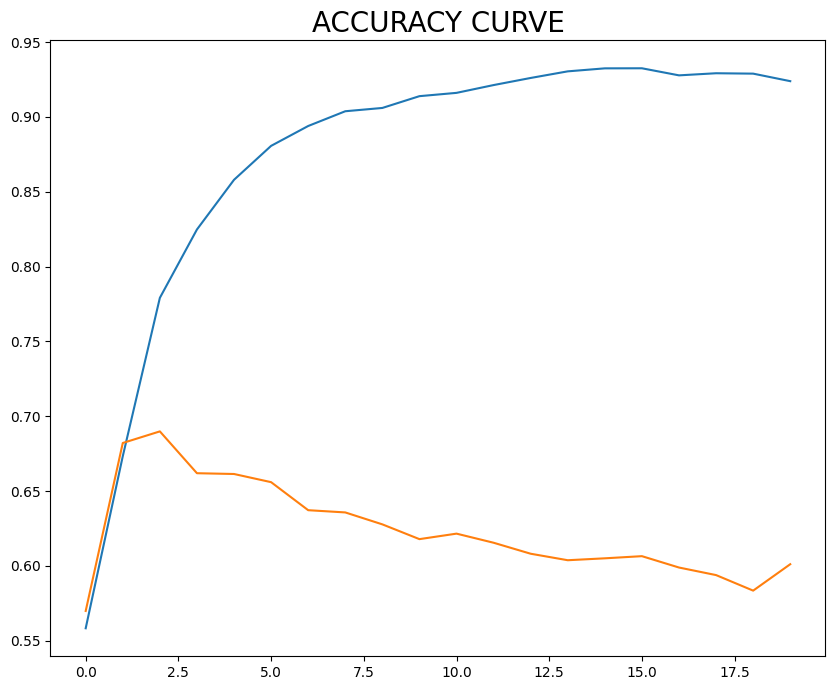

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [ ]:
test_predictions = (model.predict(tokens_test) > 0.5).astype(int)
test_predictions[:,i,0] = test_predictions[:,i,0]
from sklearn.metrics import classification_report
print(classification_report(test_labels, test_predictions))
test_predictions

31/31 [==============================] - 2s 50ms/step
              precision    recall  f1-score   support

           0       0.57      0.51      0.54       454
           1       0.62      0.67      0.64       531

    accuracy                           0.60       985
   macro avg       0.59      0.59      0.59       985
weighted avg       0.60      0.60      0.60       985



array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

# LSTM Model

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, input_length=70))
model1.add(LSTM(units=100,return_sequences = True))
model1.add(Dense(10))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model1.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 70, 100)           1049800   
                                                                 
 lstm_36 (LSTM)              (None, 70, 100)           80400     
                                                                 
 dense_41 (Dense)            (None, 70, 10)            1010      
                                                                 
 dense_42 (Dense)            (None, 70, 1)             11        
                                                                 
Total params: 1,131,221
Trainable params: 1,131,221
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train=model1.fit(tokens_train,train_labels,validation_data=(tokens_val,val_labels),epochs=20,batch_size=256)

Epoch 1/20
31/31 [==============================] - 6s 157ms/step - loss: 0.6872 - accuracy: 0.5474 - val_loss: 0.6793 - val_accuracy: 0.5732
Epoch 2/20
31/31 [==============================] - 5s 151ms/step - loss: 0.6470 - accuracy: 0.6338 - val_loss: 0.6250 - val_accuracy: 0.6616
Epoch 3/20
31/31 [==============================] - 4s 117ms/step - loss: 0.5162 - accuracy: 0.7548 - val_loss: 0.6066 - val_accuracy: 0.6829
Epoch 4/20
31/31 [==============================] - 4s 119ms/step - loss: 0.3871 - accuracy: 0.8386 - val_loss: 0.6818 - val_accuracy: 0.6657
Epoch 5/20
31/31 [==============================] - 6s 189ms/step - loss: 0.2990 - accuracy: 0.8822 - val_loss: 0.8104 - val_accuracy: 0.6433
Epoch 6/20
31/31 [==============================] - 4s 118ms/step - loss: 0.2346 - accuracy: 0.9110 - val_loss: 0.9218 - val_accuracy: 0.6250
Epoch 7/20
31/31 [==============================] - 4s 119ms/step - loss: 0.1798 - accuracy: 0.9359 - val_loss: 1.0942 - val_accuracy: 0.6189
Epoch 

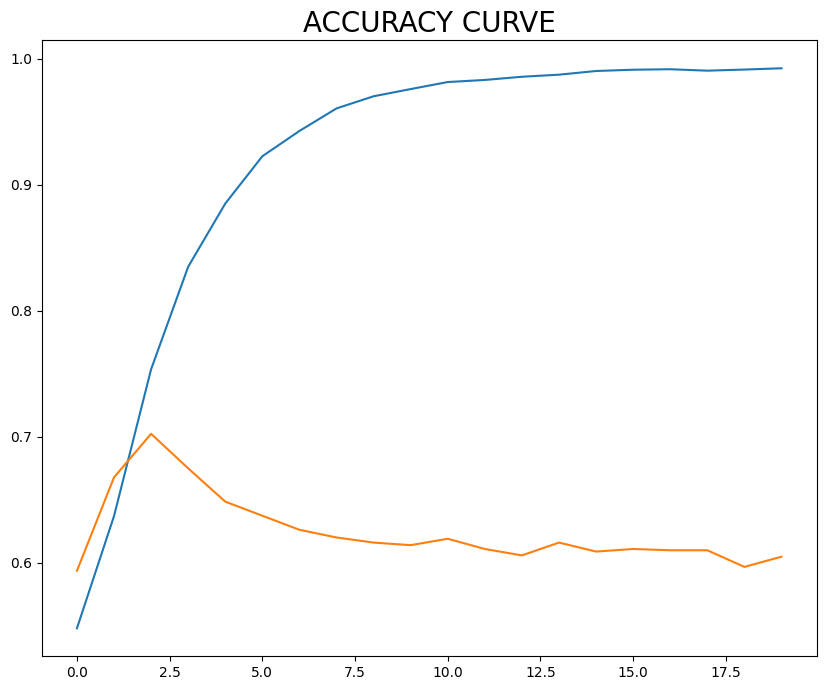

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

In [ ]:
test_predictions = model1.predict(tokens_test)
pred = (test_predictions.sum(axis=1)/70 > 0.5).astype(int).flatten()
from sklearn.metrics import classification_report
print(classification_report(test_labels, pred))
pred.shape

31/31 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       454
           1       0.63      0.69      0.66       531

    accuracy                           0.62       985
   macro avg       0.61      0.61      0.61       985
weighted avg       0.61      0.62      0.61       985



(985,)